In [64]:
import pandas as pd

from src.forecastingToolkit import *
import matplotlib.pyplot as plt
from stationarity_toolkit.stationarity_toolkit import StationarityToolkit
import xgboost as xgb

In [65]:
state = "FL"

In [66]:
property_data = prepare_property_data(state)
property_data

,PropertyName,Address,City,State,ZipCode,PhoneNumber,TotalSqFt,NetRentableSqFt,TotalAcres,NumBuildings,...,PropertyStatus,ImpressionRating,LocationRating,CompletionDate,Week,Year,Month,quarter,year_quarter,year_month
1957,Rocker Lockers,5151 East Irlo Bronson Memorial Hwy,St Cloud,FL,34771.0,4.078922e+09,42570.0,40441.0,4.98,13.0,...,Completed,B,C+,2015-01-01,1.0,2015.0,1.0,1.0,2015-1.0-01,2015-01-31
5724,CubeSmart Self Storage,5501 NW 15th Street,Margate,FL,33063.0,9.549750e+09,71754.0,68166.0,5.00,3.0,...,Completed,B,A-,1983-01-01,52.0,1983.0,1.0,1.0,1983-1.0-01,1983-01-31
5725,CubeSmart Self Storage,2010 NE 7th Avenue,Dania Beach,FL,33004.0,9.545253e+09,253119.0,189839.0,6.10,1.0,...,Completed,B,C,1985-01-01,1.0,1985.0,1.0,1.0,1985-1.0-01,1985-01-31
5726,CubeSmart Self Storage,349 West Hillsboro Blvd,Deerfield Beach,FL,33441.0,9.544264e+09,67350.0,57247.0,4.55,7.0,...,Completed,A,B-,1998-01-01,1.0,1998.0,1.0,1.0,1998-1.0-01,1998-01-31
5727,CubeSmart Self Storage,6550 SW 160th Avenue,Southwest Ranches,FL,33331.0,9.548800e+09,88308.0,66231.0,2.55,5.0,...,Completed,A,B+,2004-01-01,1.0,2004.0,1.0,1.0,2004-1.0-01,2004-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28589,Extra Space Storage,1650 7th Avenue North,St. Petersburg,FL,33713.0,7.279149e+09,108948.0,81711.0,3.35,1.0,...,Completed,A,C+,2019-11-11,46.0,2019.0,11.0,4.0,2019-10.0-01,2019-11-30
28648,Morningstar Storage,1751 Ballpark Road,Kissimmee,FL,34741.0,4.078016e+09,99791.0,74843.0,2.14,1.0,...,Completed,A,B-,2018-08-15,33.0,2018.0,8.0,3.0,2018-7.0-01,2018-08-31
28650,Pineda Business Complex Storage,5325 North Wickham Road,Melbourne,FL,32940.0,3.214807e+09,8400.0,7980.0,4.88,4.0,...,Completed,B,B,2018-12-10,50.0,2018.0,12.0,4.0,2018-10.0-01,2018-12-31
28651,Storage King USA,2925 North Poinciana Blvd,Kissimmee,FL,34746.0,4.076324e+09,109188.0,81891.0,2.47,1.0,...,Completed,A,B-,2019-10-02,40.0,2019.0,10.0,4.0,2019-10.0-01,2019-10-31


In [67]:
type(property_data.year_month.values[0])

str

### Remove Outliers based on EDA Done Earlier

In [68]:
property_data = remove_outliers(property_data, "NetRentableSqFt")
property_data = remove_outliers(property_data, "NumBuildings")
property_data = remove_outliers(property_data, "NumFloors")
property_data.head()

,PropertyName,Address,City,State,ZipCode,PhoneNumber,TotalSqFt,NetRentableSqFt,TotalAcres,NumBuildings,...,PropertyStatus,ImpressionRating,LocationRating,CompletionDate,Week,Year,Month,quarter,year_quarter,year_month
1957,Rocker Lockers,5151 East Irlo Bronson Memorial Hwy,St Cloud,FL,34771.0,4.078922e+09,42570.0,40441.0,4.98,13.0,...,Completed,B,C+,2015-01-01,1.0,2015.0,1.0,1.0,2015-1.0-01,2015-01-31
5724,CubeSmart Self Storage,5501 NW 15th Street,Margate,FL,33063.0,9.549750e+09,71754.0,68166.0,5.00,3.0,...,Completed,B,A-,1983-01-01,52.0,1983.0,1.0,1.0,1983-1.0-01,1983-01-31
5726,CubeSmart Self Storage,349 West Hillsboro Blvd,Deerfield Beach,FL,33441.0,9.544264e+09,67350.0,57247.0,4.55,7.0,...,Completed,A,B-,1998-01-01,1.0,1998.0,1.0,1.0,1998-1.0-01,1998-01-31
5727,CubeSmart Self Storage,6550 SW 160th Avenue,Southwest Ranches,FL,33331.0,9.548800e+09,88308.0,66231.0,2.55,5.0,...,Completed,A,B+,2004-01-01,1.0,2004.0,1.0,1.0,2004-1.0-01,2004-01-31
5728,CubeSmart Self Storage,10755 Pembroke Road,Pembroke Pines,FL,33025.0,9.544332e+09,87486.0,74363.0,5.00,3.0,...,Completed,B,B+,1997-01-01,1.0,1997.0,1.0,1.0,1997-1.0-01,1997-01-31


### Create dataframe for rentable sqft added every month 

In [69]:
rentable_sqft_added_ts = get_rentable_sqft_by_month(property_data)

us_unemployment_rate = pd.read_csv("input_data/us_unemployment_rate_1960-2023.csv")
us_unemployment_rate["year_month"] = pd.to_datetime(pd.to_datetime(us_unemployment_rate["year_month"] + "-1",
                                                    format="%Y-%m-%d").dt.to_period('M').dt.to_timestamp(
    how="e").dt.date, format="%Y-%m-%d")
rentable_sqft_added_ts = pd.merge(rentable_sqft_added_ts.reset_index(), us_unemployment_rate, on="year_month", how="left")
rentable_sqft_added_ts

,year_month,NetRentableSqFt,Unemployment Rate
0,1971-01-31,381441.0,5.9
1,1971-02-28,0.0,5.9
2,1971-03-31,0.0,6.0
3,1971-04-30,0.0,5.9
4,1971-05-31,0.0,5.9
...,...,...,...
629,2023-06-30,0.0,3.6
630,2023-07-31,0.0,3.5
631,2023-08-31,0.0,3.8
632,2023-09-30,0.0,3.8


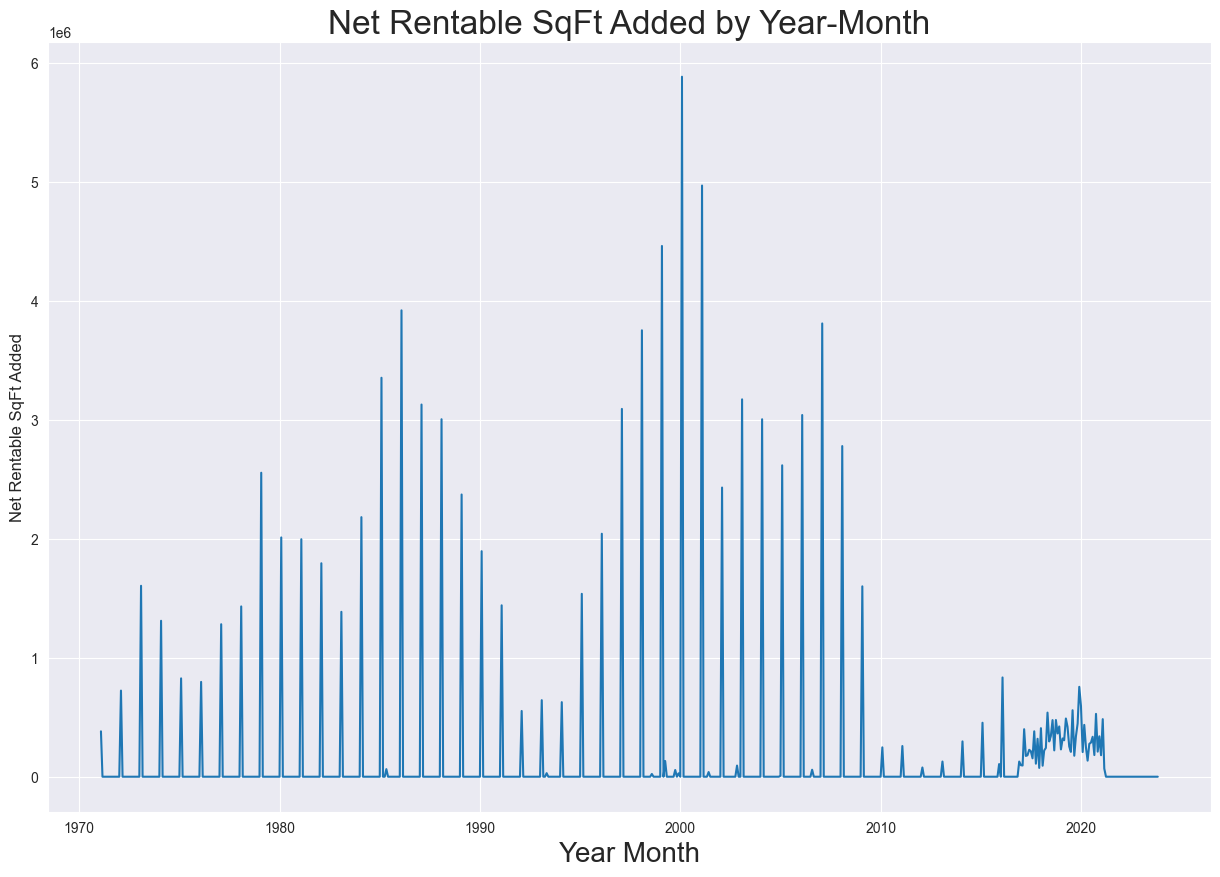

In [70]:
plt.figure(figsize=(15, 10))
plt.plot(rentable_sqft_added_ts["year_month"], rentable_sqft_added_ts.NetRentableSqFt, linestyle='-', label="NetRentableSqFt Added")
plt.grid(True)
plt.xlabel('Year Month', fontsize=20)
plt.ylabel('Net Rentable SqFt Added', fontsize=12)
plt.title('Net Rentable SqFt Added by Year-Month', fontsize=24)
plt.show()

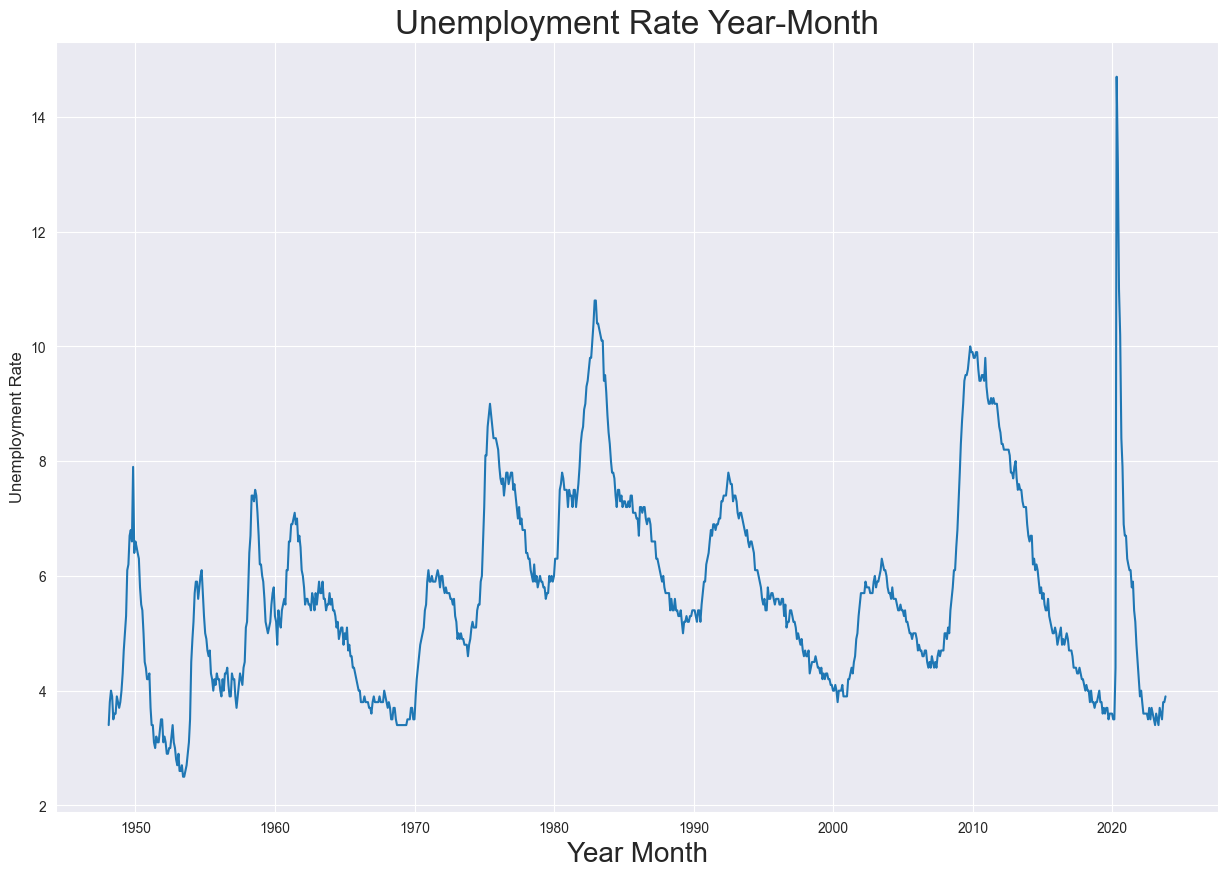

In [71]:
plt.figure(figsize=(15, 10))
plt.plot(us_unemployment_rate["year_month"], us_unemployment_rate["Unemployment Rate"], linestyle='-', label="Unemployment Rate")
plt.grid(True)
plt.xlabel('Year Month', fontsize=20)
plt.ylabel('Unemployment Rate', fontsize=12)
plt.title('Unemployment Rate Year-Month', fontsize=24)
plt.show()

### Now lets create time series features to train xgboost model

In [72]:
# Lag Features
timeseries = rentable_sqft_added_ts.dropna()
def create_lag_features(data, lags):
    for lag in lags:
        data[f'Lag_{lag}'] = data['NetRentableSqFt'].shift(lag)
    return data

data = create_lag_features(timeseries, lags=[6, 12])  # Create lag features for 1 day, 7 days, and 30 days

# Rolling Statistics (Moving Averages)
def create_rolling_statistics(data, windows):
    for window in windows:
        data[f'Mean_{window}'] = data['NetRentableSqFt'].rolling(window=window).mean()
        data[f'Std_{window}'] = data['NetRentableSqFt'].rolling(window=window).std()
    return data

data = create_rolling_statistics(data, windows=[6, 12])  # Create rolling statistics for different windows

# Seasonal Indicators
data['Month'] = data.year_month.dt.month  # Extract month of the year
data['Year'] = data.year_month.dt.year

data

,year_month,NetRentableSqFt,Unemployment Rate,Lag_6,Lag_12,Mean_6,Std_6,Mean_12,Std_12,Month,Year
0,1971-01-31,381441.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,1,1971
1,1971-02-28,0.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,2,1971
2,1971-03-31,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3,1971
3,1971-04-30,0.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,4,1971
4,1971-05-31,0.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,5,1971
...,...,...,...,...,...,...,...,...,...,...,...
629,2023-06-30,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,6,2023
630,2023-07-31,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,7,2023
631,2023-08-31,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,8,2023
632,2023-09-30,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,9,2023


### Perform time series cross-validation

In [73]:
from sklearn.metrics import mean_squared_error

def get_mape(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE).

    Parameters:
        - y_true: Array-like, true values.
        - y_pred: Array-like, predicted values.

    Returns:
        - MAPE: Mean Absolute Percentage Error.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Function to perform time series cross-validation
def non_parametric_ts_cross_validation(data, n_splits):
    # Determine the fold size
    fold_size = len(data) // n_splits

    # Initialize a list to store RMSE values
    rmse_values = []
    # Perform cross-validation
    # Perform time series cross-validation
    for i in range(1, n_splits + 1):
        # Define the start and end indices for the current fold
        start_idx = (i - 1) * fold_size
        end_idx = i * fold_size
    
        # Split the data into training and testing sets for the current fold
        train_data = data.iloc[:start_idx]
        test_data = data.iloc[end_idx:end_idx + fold_size]
    
        # Split the features and target variable
        X_train = train_data.drop(columns=['year_month', 'NetRentableSqFt'])
        y_train = train_data['NetRentableSqFt']
        X_test = test_data.drop(columns=['year_month', 'NetRentableSqFt'])
        y_test = test_data['NetRentableSqFt']
    
        # Initialize and train the XGBoost model
        model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
        model.fit(X_train, y_train)
    
        # Make predictions for the current fold
        predictions = model.predict(X_test)
    
        # Calculate RMSE for this fold
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmse_values.append(rmse)
    
        # Print RMSE for the current fold (optional)
        print(f'Fold {i} RMSE: {rmse}')
    
    # Calculate the mean RMSE across all folds
    mean_rmse = np.mean(rmse_values)
    return mean_rmse

In [74]:
# Define model
mean_rmse = non_parametric_ts_cross_validation(data, 5)
print(f"Mean RMSE: {mean_rmse}")

Fold 1 RMSE: 726884.3169413505
Fold 2 RMSE: 506545.47813230654
Fold 3 RMSE: 86369.41908292122
Fold 4 RMSE: 331566.56494492554
Fold 5 RMSE: 7712.7724609375
Mean RMSE: 331815.71031248826


### Train the XGBoost Model on all ts variables along with unemployment rate

In [75]:
data

,year_month,NetRentableSqFt,Unemployment Rate,Lag_6,Lag_12,Mean_6,Std_6,Mean_12,Std_12,Month,Year
0,1971-01-31,381441.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,1,1971
1,1971-02-28,0.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,2,1971
2,1971-03-31,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3,1971
3,1971-04-30,0.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,4,1971
4,1971-05-31,0.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,5,1971
...,...,...,...,...,...,...,...,...,...,...,...
629,2023-06-30,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,6,2023
630,2023-07-31,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,7,2023
631,2023-08-31,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,8,2023
632,2023-09-30,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,9,2023


In [76]:
X = data.drop(columns=['year_month', 'NetRentableSqFt'])
Y = data["NetRentableSqFt"]
model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X, Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

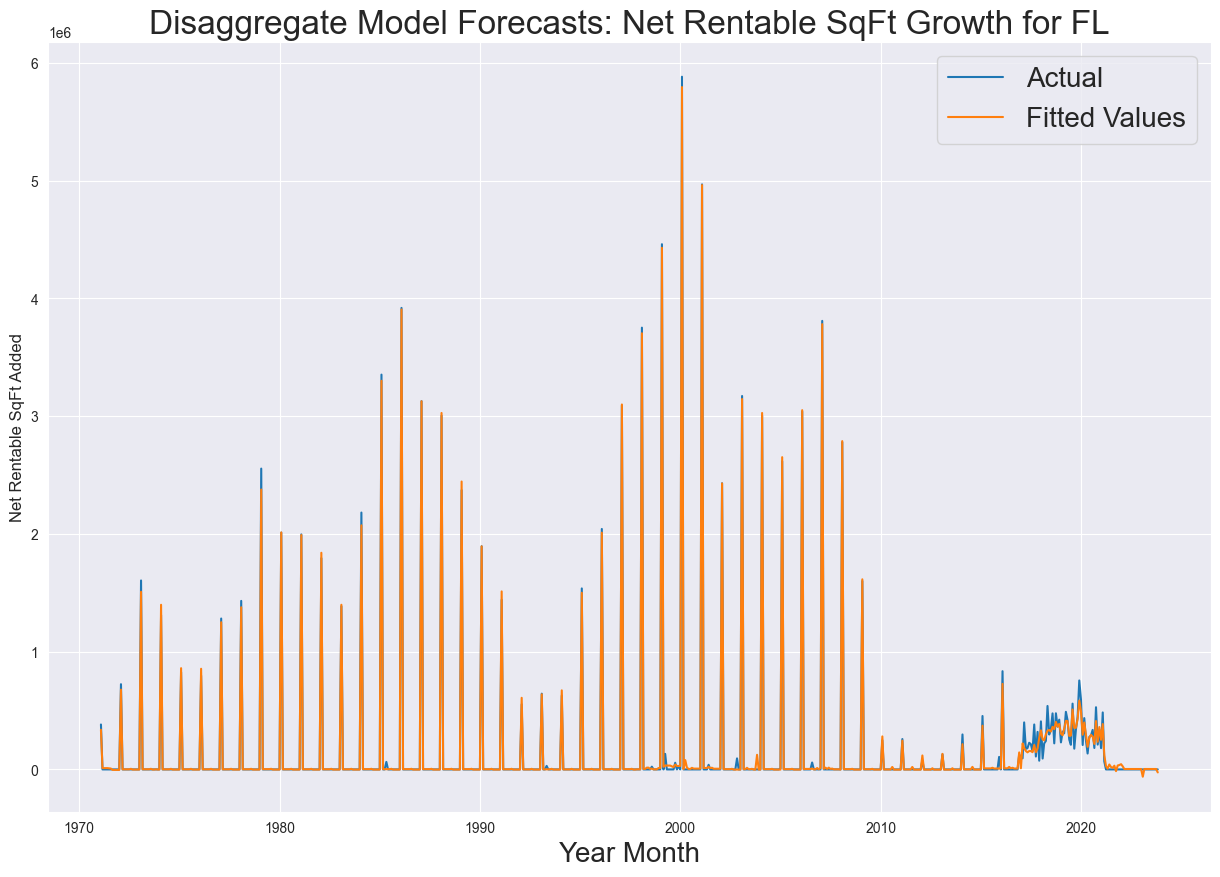

In [77]:
# Disaggregate Model
plt.figure(figsize=(15, 10))
plt.plot(data["year_month"], data["NetRentableSqFt"], linestyle='-', label="Actual")
plt.plot(data["year_month"], model.predict(X), linestyle='-', label="Fitted Values")

plt.grid(True)
plt.xlabel('Year Month', fontsize=20)
plt.ylabel('Net Rentable SqFt Added', fontsize=12)
plt.title(f'Disaggregate Model Forecasts: Net Rentable SqFt Growth for {state}', fontsize=24)
plt.legend(fontsize=20)

plt.show()

In [78]:
fitted = model.predict(X)
fitted = pd.DataFrame(fitted, index=data.year_month)
fitted = fitted.reset_index()
fitted.columns = ["year_month", "NetRentableSqFt"]
fitted["Year"] = fitted["year_month"].dt.year

Aggregate Model RMSE
90591.2720262461


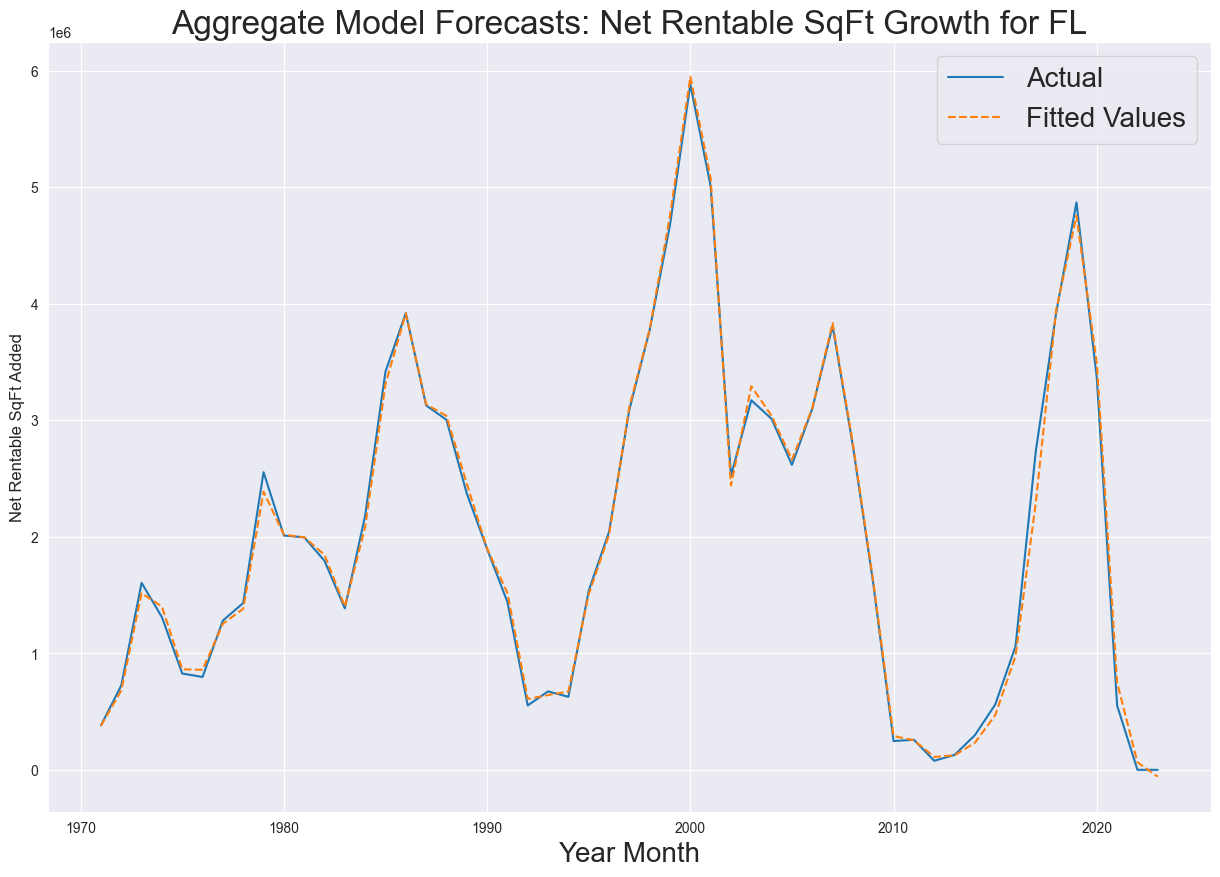

In [79]:
# Aggregate Model
plt.figure(figsize=(15, 10))
ndata = data.copy()
ndata["Year"] = ndata["year_month"].dt.year
ndata = ndata[["Year", "NetRentableSqFt"]].groupby("Year").sum()
plt.plot(ndata.index, ndata.values, linestyle='-', label="Actual")
plt.legend()

fitted = model.predict(X)
fitted = pd.DataFrame(fitted, index=data.year_month)
fitted = fitted.reset_index()
fitted.columns = ["year_month", "NetRentableSqFt"]
fitted["Year"] = fitted["year_month"].dt.year
fitted = fitted[["Year", "NetRentableSqFt"]].groupby("Year").sum()

plt.plot(fitted.index, fitted.NetRentableSqFt, linestyle='--', label="Fitted Values")

plt.grid(True)
plt.xlabel('Year Month', fontsize=20)
plt.ylabel('Net Rentable SqFt Added', fontsize=12)
plt.title(f'Aggregate Model Forecasts: Net Rentable SqFt Growth for {state}', fontsize=24)
plt.legend(fontsize=20)

print("Aggregate Model RMSE")
rmse = np.sqrt(mean_squared_error(ndata.loc[fitted.index.min():fitted.index.max(), "NetRentableSqFt"], fitted["NetRentableSqFt"]))
print(rmse)
plt.show()

### A low RMSE (74338.7 in this case) can mean captured opportunity or prudent construction of Rental spaces

### Now let's see what this model suggests that we should do in the next 1 year

In [80]:
# future unemploymentrates assuming it followed the same pattern as 2022-2023
us_unemployment_rate_proj = [
    ('2023-10', 3.9),
    ('2024-09', 3.8),
    ('2024-08', 3.8),
    ('2024-07', 3.5),
    ('2024-06', 3.6),
    ('2024-05', 3.7),
    ('2024-04', 3.4),
    ('2024-03', 3.5),
    ('2024-02', 3.6),
    ('2024-01', 3.4),
    ('2023-12', 3.5),
    ('2023-11', 3.6)
]

# Create a DataFrame from the data
future_unemployment_rate = pd.DataFrame(us_unemployment_rate_proj, columns=['Date', 'Unemployment Rate'])

# Display the DataFrame
print(future_unemployment_rate)

       Date  Unemployment Rate
0   2023-10                3.9
1   2024-09                3.8
2   2024-08                3.8
3   2024-07                3.5
4   2024-06                3.6
5   2024-05                3.7
6   2024-04                3.4
7   2024-03                3.5
8   2024-02                3.6
9   2024-01                3.4
10  2023-12                3.5
11  2023-11                3.6


In [81]:
data

,year_month,NetRentableSqFt,Unemployment Rate,Lag_6,Lag_12,Mean_6,Std_6,Mean_12,Std_12,Month,Year
0,1971-01-31,381441.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,1,1971
1,1971-02-28,0.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,2,1971
2,1971-03-31,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3,1971
3,1971-04-30,0.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,4,1971
4,1971-05-31,0.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,5,1971
...,...,...,...,...,...,...,...,...,...,...,...
629,2023-06-30,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,6,2023
630,2023-07-31,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,7,2023
631,2023-08-31,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,8,2023
632,2023-09-30,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,9,2023


In [82]:
# Determine the last date in the historical data
last_date = data['year_month'].max()

# Define future dates for which you want to generate data
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')

# Create lag features for future dates
future_lag_features = create_lag_features(data, lags=[6, 12])
lag_cols = [c for c in future_lag_features.columns if c.find("Lag")!=-1]
future_lag_features = future_lag_features.tail(len(future_dates)).reset_index(drop=True)[lag_cols]

# Create rolling statistics for future dates
future_rolling_features = create_rolling_statistics(data, windows=[6, 12])
rolling_cols = [c for c in future_rolling_features.columns if (c.find("Mean")!=-1) or (c.find("Std")!=-1)]
future_rolling_features = future_rolling_features.tail(len(future_dates)).reset_index(drop=True)[rolling_cols]

# Extract seasonal indicators for future dates
future_seasonal_features = pd.DataFrame({
    'Month': future_dates.month,
    'Year': future_dates.year
})

# Concatenate future features into a single DataFrame
future_features = pd.concat([future_unemployment_rate["Unemployment Rate"], future_lag_features, future_rolling_features, future_seasonal_features], axis=1)
# future_features = future_features.drop(columns=["year_month", 'trend_transformed'])

future_features

,Unemployment Rate,Lag_6,Lag_12,Mean_6,Std_6,Mean_12,Std_12,Month,Year
0,3.9,0.0,0.0,0.0,0.0,0.0,0.0,11,2023
1,3.8,0.0,0.0,0.0,0.0,0.0,0.0,12,2023
2,3.8,0.0,0.0,0.0,0.0,0.0,0.0,1,2024
3,3.5,0.0,0.0,0.0,0.0,0.0,0.0,2,2024
4,3.6,0.0,0.0,0.0,0.0,0.0,0.0,3,2024
5,3.7,0.0,0.0,0.0,0.0,0.0,0.0,4,2024
6,3.4,0.0,0.0,0.0,0.0,0.0,0.0,5,2024
7,3.5,0.0,0.0,0.0,0.0,0.0,0.0,6,2024
8,3.6,0.0,0.0,0.0,0.0,0.0,0.0,7,2024
9,3.4,0.0,0.0,0.0,0.0,0.0,0.0,8,2024


In [83]:
future_predictions = pd.Series(model.predict(future_features), index=future_dates)
future_predictions

2023-11-30   -25365.833984
2023-12-31     3520.999268
2024-01-31   -61995.726562
2024-02-29     3520.999268
2024-03-31     3520.999268
2024-04-30     3520.999268
2024-05-31     3520.999268
2024-06-30     3520.999268
2024-07-31     3520.999268
2024-08-31     3520.999268
2024-09-30     3520.999268
2024-10-31     3520.999268
Freq: M, dtype: float32

In [84]:
one_year_agg_forecast = future_predictions.sum()
if one_year_agg_forecast >= 0:
    print(f"In the next one year: Increase Rental sqft by: {round(one_year_agg_forecast, 2)} sqft in {state}")
else:
    print(f"In the next one year: Decrease Rental sqft by: {round(abs(one_year_agg_forecast), 2)} sqft in {state}")

In the next one year: Decrease Rental sqft by: 52151.55859375 sqft in FL
